In [1]:
import os

from src.load_data import load_matches
from src.offball_wrappers import a_obr_per_subtype,a_obr_per_subtype_per_phase, a_obr_per_subtype_per_team, a_obr_per_subtype_per_player, a_xthreat_per_run_group
from src.density_change import a_ddc_distance_player, metric_ddc
from src.space_creation import metric_sc
from src.tracking_functions import find_frame_start_end, get_player_coordinates, get_opp_team_players_coordinates, get_team_players_coordinates, get_frame_object
from src.overall_profile import obr_radar_all

## IMPORTANT
The probability that a goal will be scored 10 seconds after a player is successfully served a pass.
If the player was not targeted by a pass, it is calculated at the passing moment. <-- This is the way they say how good a runner is or the effect that he has. However, this only refers if he receives the pass. But a lot of move form midfielders is not to receive the ball but to generate space or create passing options. Thats why we are doing this.!!!!

-----------------------------------------------------------------------------------------------------


2. Quadrant talent map
Make a 2D scatter:

x‑axis: space_creation per run (or per90).

y‑axis: defensive_density_change per run (or per90).

Color or size points by number of runs per90. Then define quadrants:

Top‑right: “elite space finders” – create space and get free a lot.

Top‑left: “pressure escapists” – get free but don’t open much space behind.

Bottom‑right: “space openers for others” – create space where they were but stay more marked.

Bottom‑left: low impact movers.

This is a very clear talent‑ID picture: look for young/underused players in the top‑right with decent volume.

-----------------------------------------------------------------------------------------------------

Use these type of runs for space_created (and maybe def density change too): BUILD UP RUNS

The others are more in line with xthreat if they receive the ball: PROGRESSION AND DIRECT RUNS

AND AMAZING EXEMPLE OF SPACE CREATED Plotting event ID: 1_91, Player ID: 11117, Subtype: coming_short, Plotting event ID: 1_102, Player ID: 11117, Subtype: coming_short

-----------------------------------------------------------------------------------------------------

### Recommended radar with that choice
Given everything so far, a clean, phase-aligned impact radar could be:

Defensive density change – Build-up runs

Space creation – Build-up runs

Defensive density change – Progression runs

xThreat – Progression runs

xThreat – Direct runs

Distance covered in possession – per 90

All per 90, role-relative percentiles.

-----------------------------------------------------------------------------------------------------

In [2]:
# load matches
data_path = os.path.join(os.getcwd(), "src/data")
all_tracking, dynamic_events_all, all_metadata = load_matches(data_path)

c:\Users\g4a4b\OneDrive - University of Twente\SportsAnalyticsProject\analytics_cup_research\src\load_data.py:56: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  de_match = pd.read_csv(url)
c:\Users\g4a4b\OneDrive - University of Twente\SportsAnalyticsProject\analytics_cup_research\src\load_data.py:56: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  de_match = pd.read_csv(url)


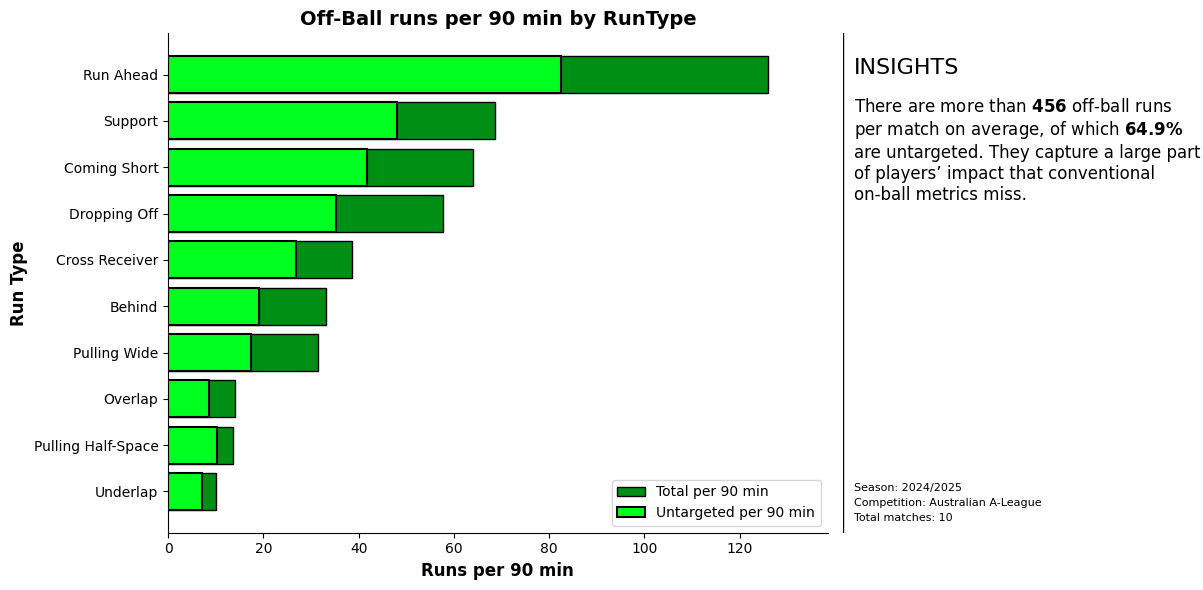

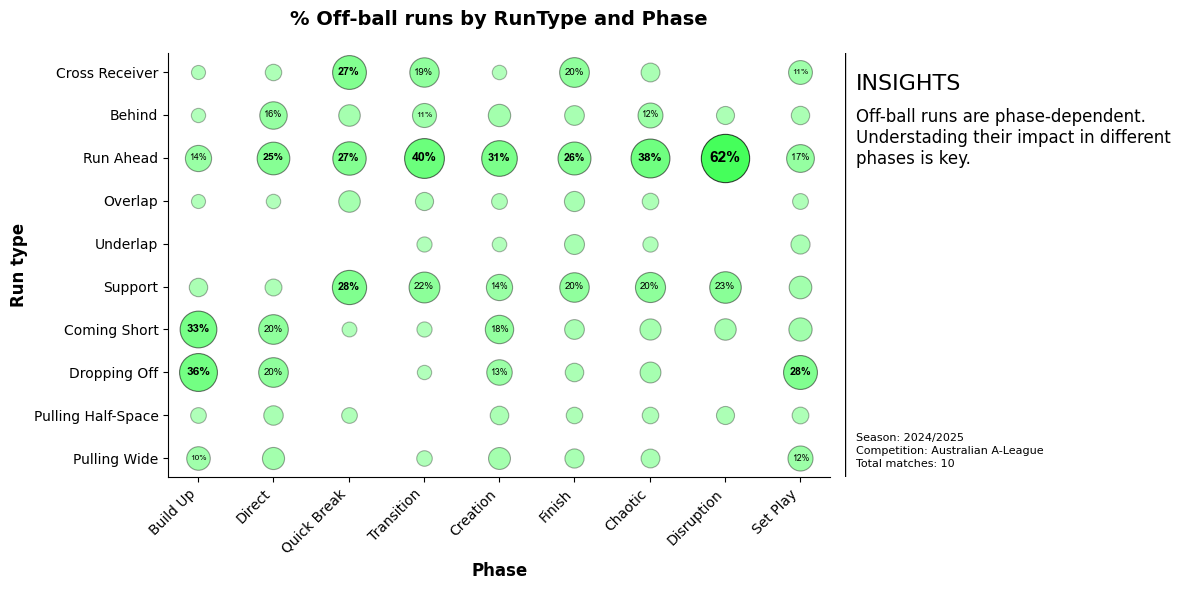

In [3]:
# analysis of off ball runs per 90 minutes
a_obr_per_subtype(all_tracking,dynamic_events_all)

# analysis of off ball runs per subtype per phase
a_obr_per_subtype_per_phase(dynamic_events_all)

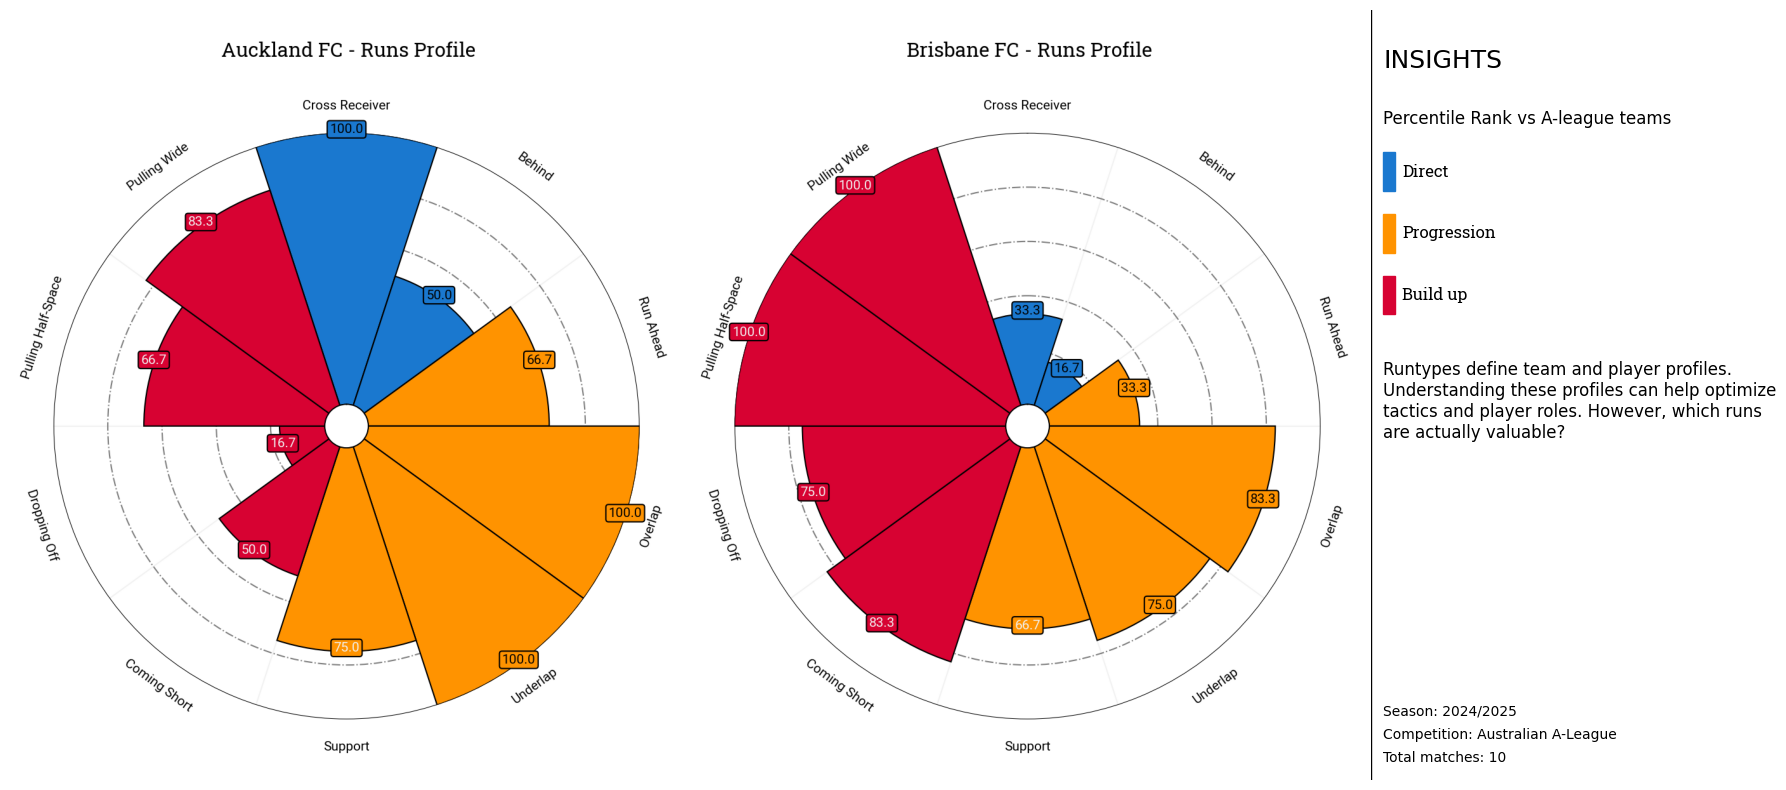

In [4]:
# analysis of off ball runs per subtype per team per 90 minutes
a_obr_per_subtype_per_team(all_tracking, dynamic_events_all, teams_shortnames=["Auckland FC", "Brisbane FC"])

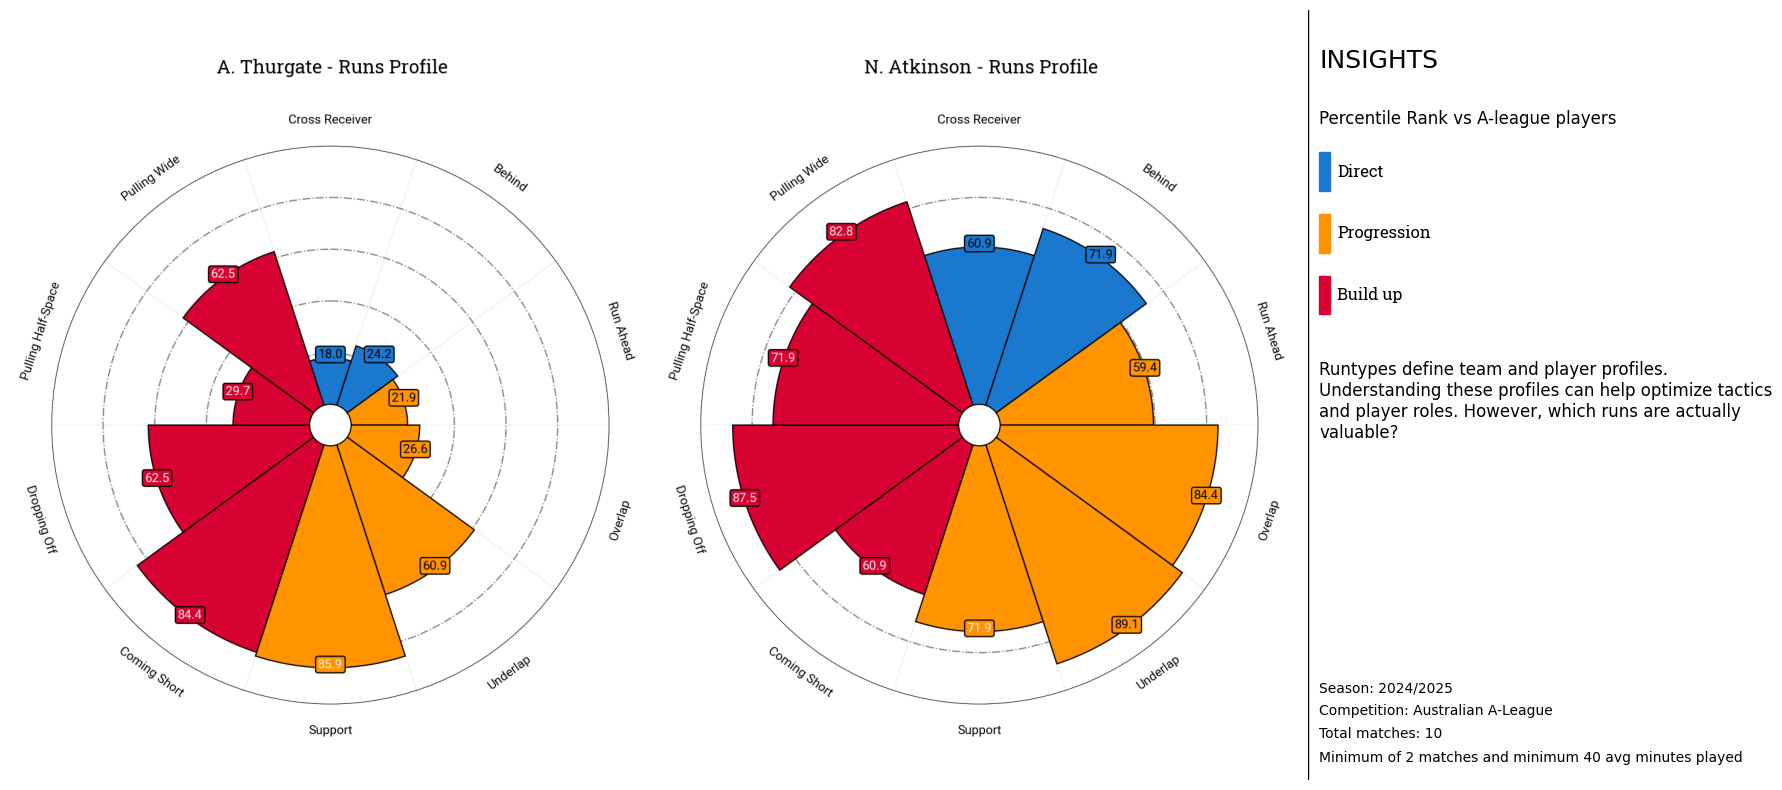

In [5]:
# analysis of off ball runs per subtype per player per 90 minutes
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["A. Thurgate", "N. Atkinson"], min_matches=2, min_avg_minutes_played=40)


Midfielders rank second in how evenly their off‑ball runs are spread across different run types, very close to forwards, while still accounting for a substantial share of all runs. Combined with the available physical aggregation data for this position group, this makes midfielders a natural choice for a deeper analysis of how off‑ball movement creates space and passing options.

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674


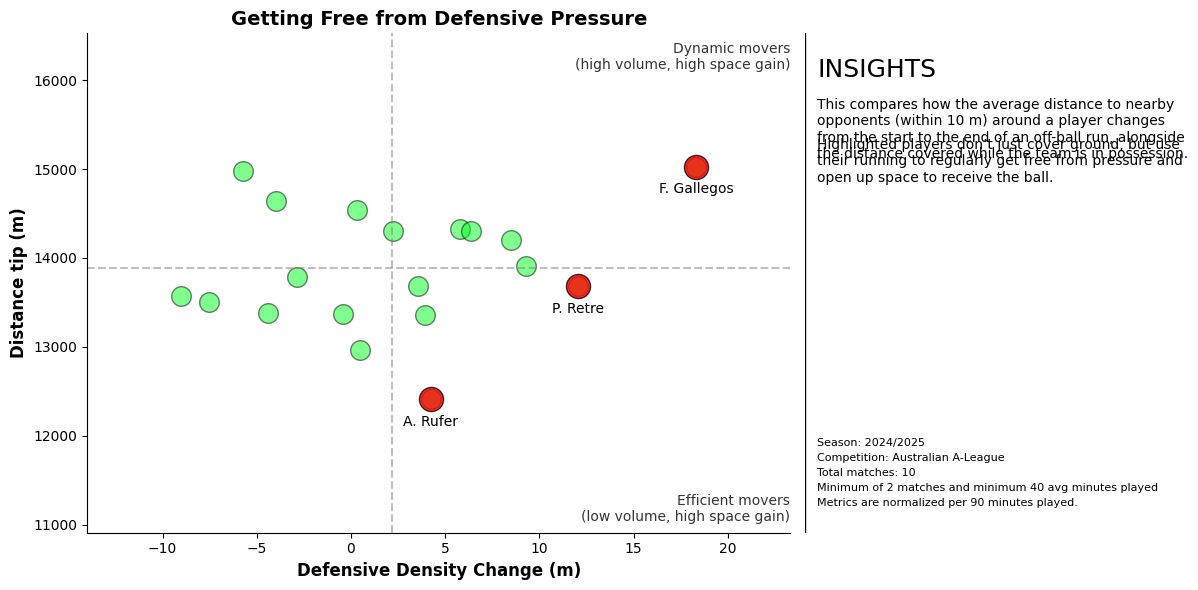

In [4]:
a_ddc_distance_player(dynamic_events_all, all_tracking, all_metadata, data_path, min_matches=2, min_avg_minutes_played=40)

In [3]:
mid_obr_grouped, mid_obr_merged = metric_sc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events after filtering for Build Up Runs: 304
Number of events to process for space created: 298
Number of events after processing for space created: 291
Number of events after calculating space created for Build Up Runs: 291
Number of events after removing outliers for space created: 255


In [13]:
print(mid_obr_grouped)
print(mid_obr_merged)

    player_id  space_created  total_minutes  space_created_per90min
0       11117     -71.104112         183.18              -34.934873
1       14736    -309.194518         317.33              -87.692644
2       23418      85.862086         328.12               23.551102
3       26969     -41.314681         159.53              -23.307975
4       27003      15.968713         143.01               10.049536
5       50951    -108.228816         219.39              -44.398530
6       50992     210.477033         197.47               95.928156
7       51015     -25.826843         199.67              -11.641287
8       51045     219.580997         190.65              103.657433
9       51046     -44.699575          88.17              -45.627330
10      51675    -397.080386         180.31             -198.198851
11      51681    -158.406855         120.48             -118.331814
12     104563    -313.039389         197.47             -142.672533
13     133854     -61.373222         121.18     

Plotting event ID: 1_18, Player ID: 23418, Subtype: coming_short


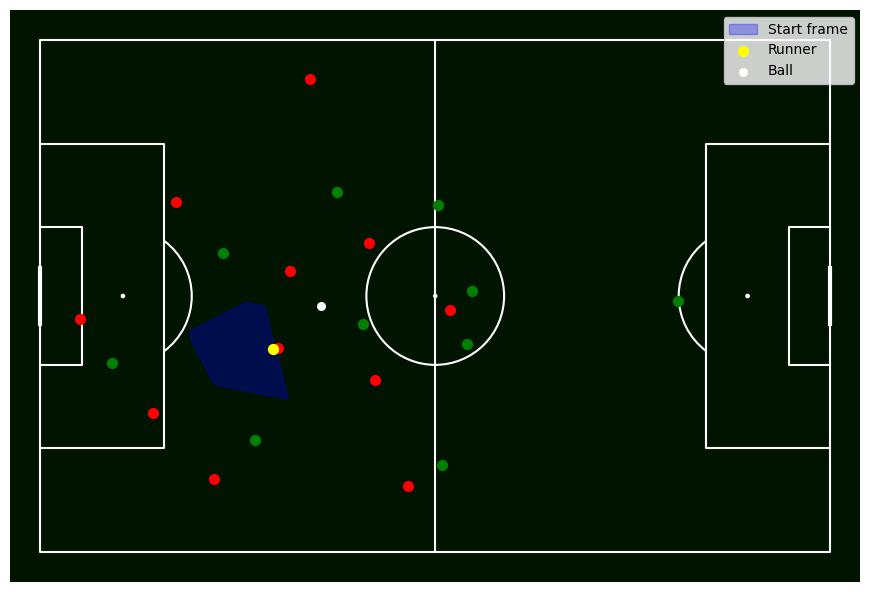

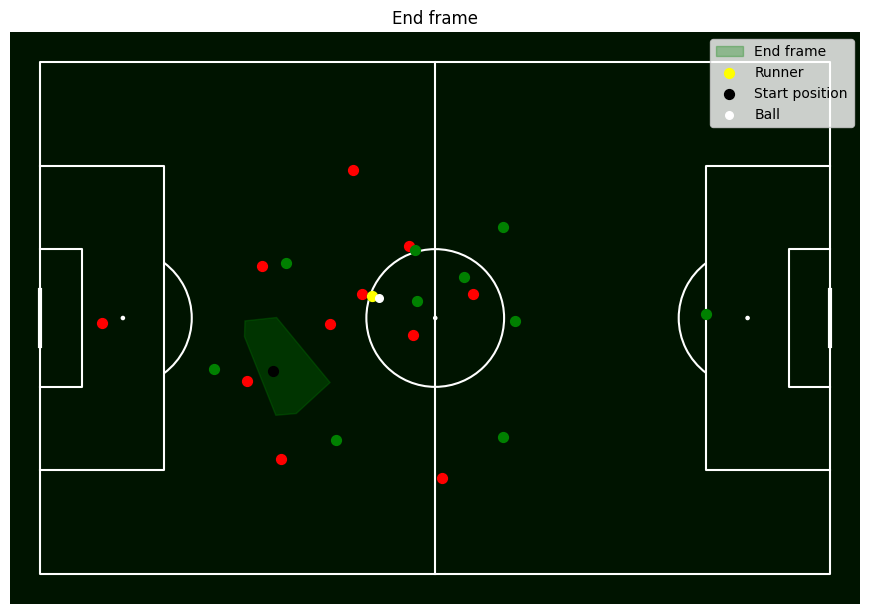

Plotting event ID: 1_21, Player ID: 23418, Subtype: pulling_half_space


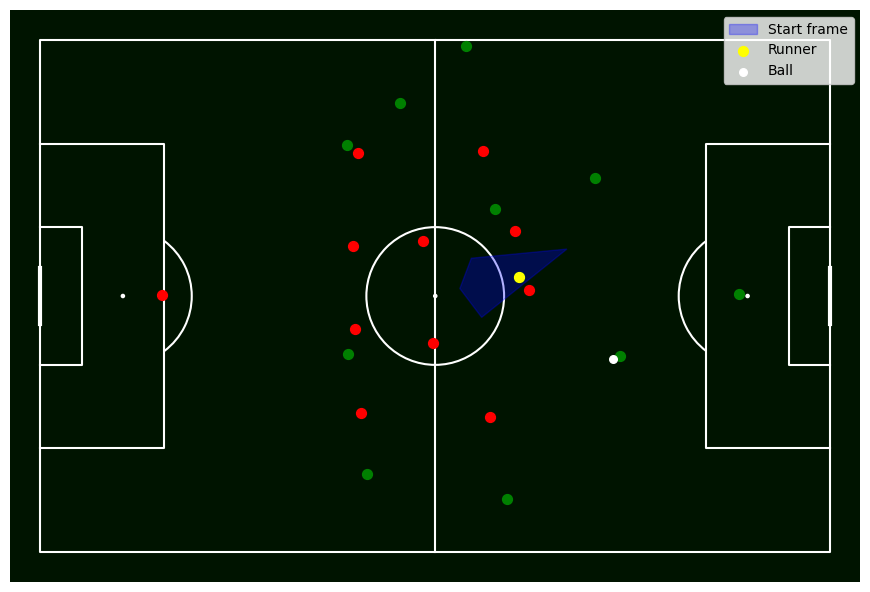

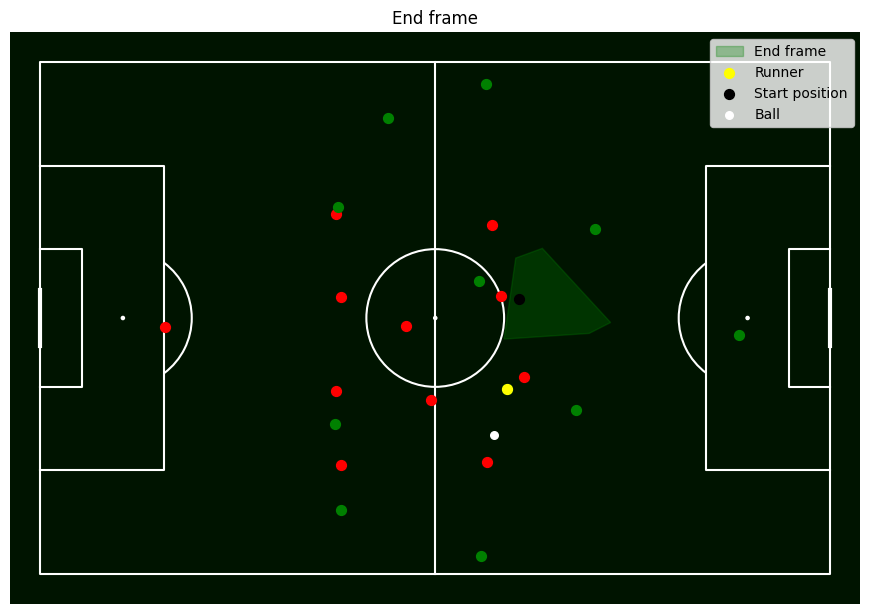

Plotting event ID: 1_23, Player ID: 14736, Subtype: pulling_half_space


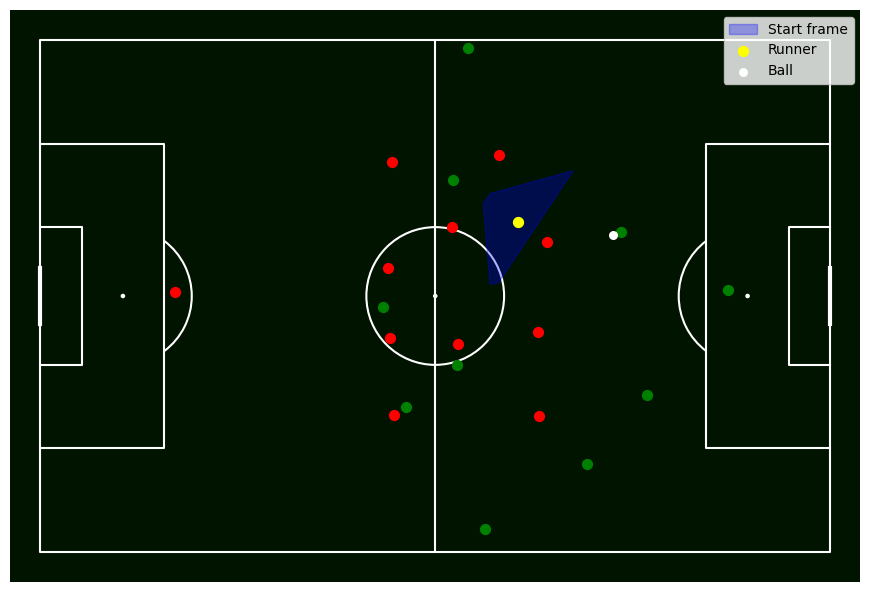

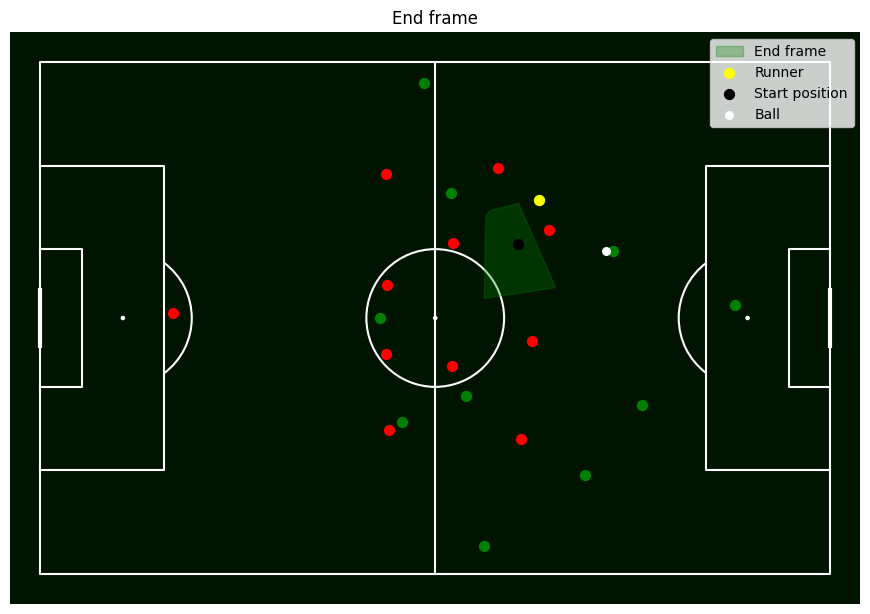

In [12]:

import matplotlib.pyplot as plt
from mplsoccer import Pitch
def plot_voronoi(pitch, all_tracking, event):

    print(f"Plotting event ID: {event.event_id}, Player ID: {event.player_id}, Subtype: {event.event_subtype}")

    # plot start frame

    fig, ax_start = pitch.grid(figheight=8, endnote_height=0, title_height=0)

    x, y = event.voronoi_poly_start.exterior.xy
    ax_start.fill(x, y, color='blue', alpha=0.3, label='Start frame')

    start_frame, end_frame = find_frame_start_end(event, all_tracking)
    if start_frame is None or end_frame is None:
        print("No tracking data available for this event.")
        return
    end_frame = get_frame_object(int(event.match_id), int(event.end_frame_sc), all_tracking)
    
    # runner coordinates
    player_coord = get_player_coordinates(start_frame, event.player_id)

    # opponent coordinates
    opp_coords = get_opp_team_players_coordinates(start_frame, event.team_id)

    # team players coordinates
    team_coords = get_team_players_coordinates(start_frame, event.team_id)

    # plot opponents
    for coord in opp_coords:
        ax_start.scatter(coord[0], coord[1], color='red', s=50, zorder=5)  # Opponent locations

    # plot team players
    for coord in team_coords:
        ax_start.scatter(coord[0], coord[1], color='green', s=50, zorder=5)  # Team player locations

     # plot runner
    ax_start.scatter(player_coord[0], player_coord[1], color='yellow', s=50, zorder=5, label='Runner')  # Runner location


    # plot ball
    ball_coord = start_frame.ball_coordinates
    ax_start.scatter(ball_coord.x, ball_coord.y, color='white', s=30, zorder=5, label='Ball')

    ax_start.legend(loc='upper right')

    plt.show()

    # --- END FRAME ---
    fig_end, ax_end = pitch.grid(figheight=8, endnote_height=0, title_height=0)

    x_e, y_e = event.voronoi_poly_end.exterior.xy
    ax_end.fill(x_e, y_e, color='green', alpha=0.3, label='End frame')

    player_coord_end = get_player_coordinates(end_frame, event.player_id)
    opp_coords_end = get_opp_team_players_coordinates(end_frame, event.team_id)
    team_coords_end = get_team_players_coordinates(end_frame, event.team_id)


    # plot opponents
    for coord in opp_coords_end:
        ax_end.scatter(coord[0], coord[1], color='red', s=50, zorder=5)  # Opponent locations
    
    # plot team players
    for coord in team_coords_end:
        ax_end.scatter(coord[0], coord[1], color='green', s=50, zorder=5)  # Team player locations
    
    # plot runner
    ax_end.scatter(player_coord_end[0], player_coord_end[1], color='yellow', s=50, zorder=5, label='Runner')  # Runner location
    
    ax_end.scatter(player_coord[0], player_coord[1], color='black', s=50, zorder=5, label='Start position')

    ball_end = end_frame.ball_coordinates
    ax_end.scatter(ball_end.x, ball_end.y, color='white', s=30, zorder=5, label='Ball')

    ax_end.legend(loc='upper right')
    ax_end.set_title("End frame")
    plt.show()


pitch = Pitch(pitch_type="skillcorner",
              pitch_length=105,
              pitch_width=68,
              pitch_color="#001400",
              line_color="white",
              linewidth=1.5)

# loop through some example events to plot from dataframe mid_obr_merged
for index, example_event in mid_obr_merged.head(3).iterrows():
    plot_voronoi(pitch, all_tracking, example_event)

In [3]:
mid_obr_ddc, mid_obr_ddc_third = metric_ddc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674


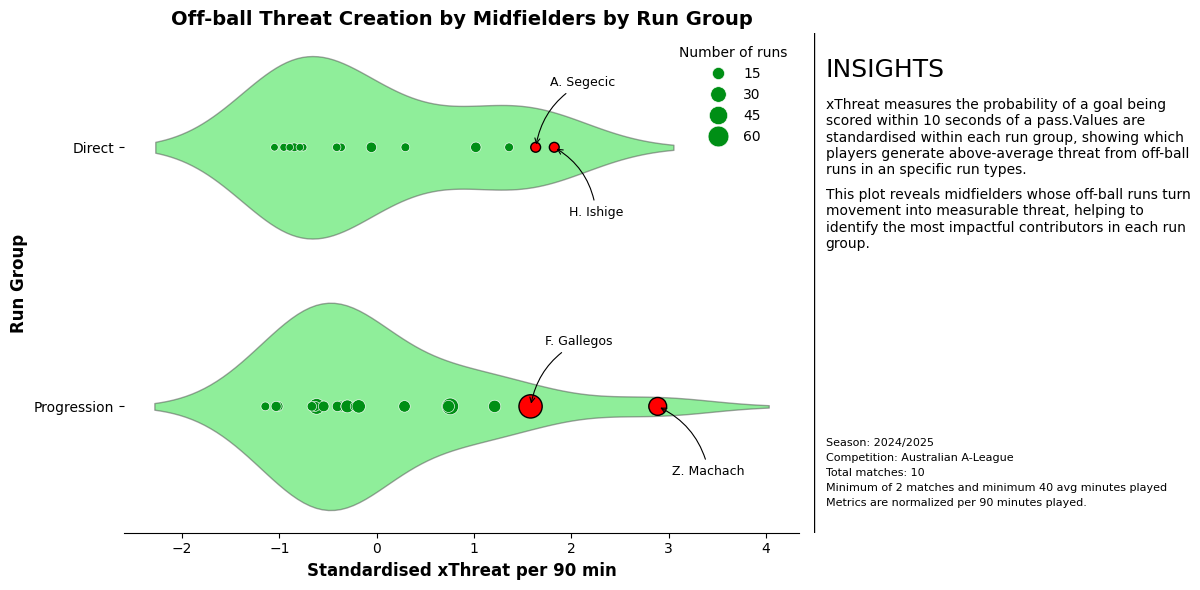

In [5]:
a_xthreat_per_run_group(dynamic_events_all, all_metadata, min_matches=2, min_avg_minutes_played=40)

In [3]:
mid_obr_radar = obr_radar_all(all_metadata, all_tracking, dynamic_events_all, data_path, min_matches=2, min_avg_minutes_played=40)
print(mid_obr_radar)

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674
Number of events after filtering for Build Up Runs: 304
Number of events to process for space created: 298


KeyboardInterrupt: 